In [2]:
import numpy as np
import matplotlib.pyplot as plt
import function as func
import sys

18.0


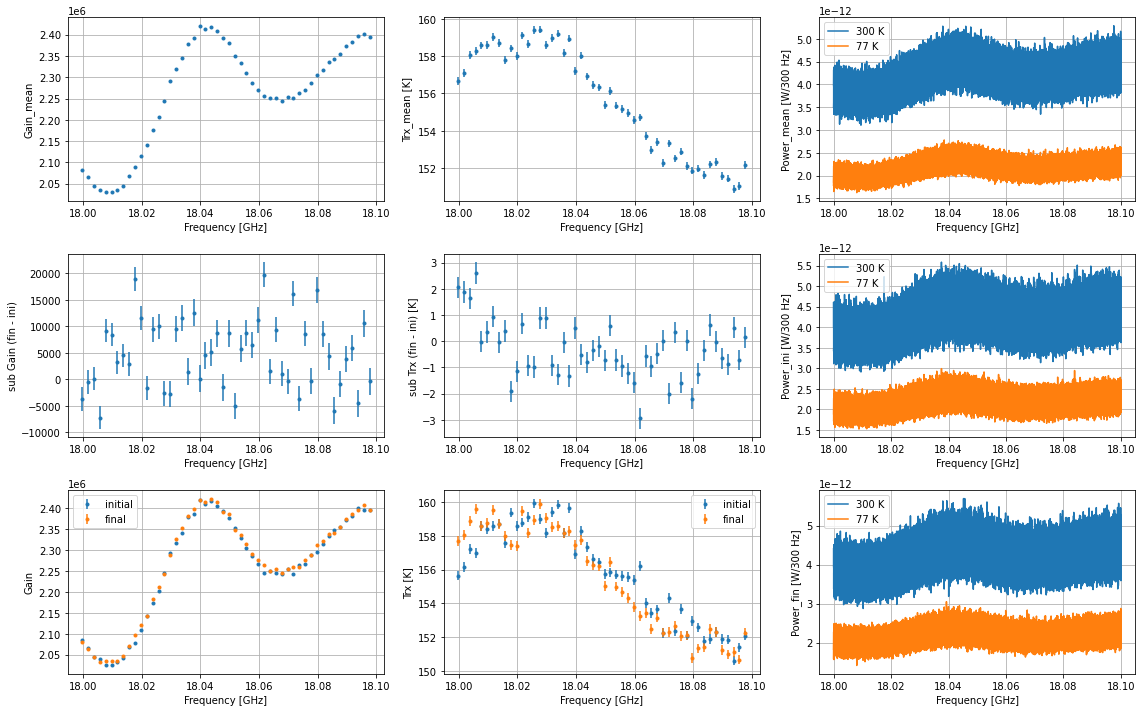

In [4]:
if __name__ == "__main__":
    for i in range(180, 181, 1):
        word = list(str(i))
        word.insert(2, ".")
        start_freq = float("".join(word))
        print(start_freq)
        
        initial = int(start_freq * 1.e+6 - 250)
        final = int(initial + 1.e+5)

        raw_freq = np.array([])
        Wamb = np.array([])
        WLN2 = np.array([])
        Wamb_initial = np.array([])
        WLN2_initial = np.array([])
        Wamb_final = np.array([])
        WLN2_final = np.array([])

        for i in range(initial, final, 2000):
            word = list(str(i))
            word.insert(2, ".")
            start = "".join(word)
            #print(start)

            # 300 K
            path = "/data/ms2840a/yfactor_raw_data/initial_300K/scan_FFT_{}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs.dat".format(start)
            f, Wamb_ini = func.dat_to_array(path)
            f, Wamb_ini = func.cut_data(f, Wamb_ini)
            path = "/data/ms2840a/yfactor_raw_data/final_300K/scan_FFT_{}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs.dat".format(start)
            f, Wamb_fin = func.dat_to_array(path)
            f, Wamb_fin = func.cut_data(f, Wamb_fin)

            Wamb = np.concatenate([Wamb, (Wamb_ini + Wamb_fin)/2], 0)
            Wamb_initial = np.concatenate([Wamb_initial, Wamb_ini], 0)
            Wamb_final = np.concatenate([Wamb_final, Wamb_fin], 0)

            # 77 K
            path = "/data/ms2840a/yfactor_raw_data/initial_77K/scan_FFT_{}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs.dat".format(start)
            f, WLN2_ini = func.dat_to_array(path)
            f, WLN2_ini = func.cut_data(f, WLN2_ini)
            path = "/data/ms2840a/yfactor_raw_data/final_77K/scan_FFT_{}GHz_span2.50MHz_rbw0.3kHz_1.0sec_1counts_1runs.dat".format(start)
            f, WLN2_fin = func.dat_to_array(path)
            f, WLN2_fin = func.cut_data(f, WLN2_fin)

            WLN2 = np.concatenate([WLN2, (WLN2_ini + WLN2_fin)/2], 0)
            WLN2_initial = np.concatenate([WLN2_initial, WLN2_ini], 0)
            WLN2_final = np.concatenate([WLN2_final, WLN2_fin], 0)

            raw_freq = np.concatenate([raw_freq, f/1e+9], 0)


        path = "/data/ms2840a/result_data/yfactor_result/start_{}GHz.csv".format(str(start_freq))
        y = func.csv_to_array(path)

        fig, axes = plt.subplots(3,3,figsize=(16,10))

        ax = axes[0][2]
        ax.plot(raw_freq, Wamb, label="300 K")
        ax.plot(raw_freq, WLN2, label="77 K")
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Power_mean [W/300 Hz]")
        ax.legend()
        ax.grid()

        ax = axes[1][2]
        ax.plot(raw_freq, Wamb_initial, label="300 K")
        ax.plot(raw_freq, WLN2_initial, label="77 K")
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Power_ini [W/300 Hz]")
        ax.legend()
        ax.grid()

        ax = axes[2][2]
        ax.plot(raw_freq, Wamb_final, label="300 K")
        ax.plot(raw_freq, WLN2_final, label="77 K")
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Power_fin [W/300 Hz]")
        ax.legend()
        ax.grid()

        fmt_op = "o"
        size_op = 3

        ax = axes[0][0]
        ax.errorbar(y["freq"], y["Gain"], yerr = y["Gain_err"], fmt=fmt_op, ms=size_op)
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Gain_mean")
        ax.grid()

        ax = axes[0][1]
        ax.errorbar(y["freq"], y["Trx"], yerr = y["Trx_err"], fmt=fmt_op, ms=size_op)
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Trx_mean [K]")
        ax.grid()

        ax = axes[1][0]
        ax.errorbar(y["freq"], y["Gain_fin"] - y["Gain_ini"], yerr = (y["Gain_ini_err"]**2 + y["Gain_fin_err"]**2)**0.5, fmt=fmt_op, ms=size_op)
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("sub Gain (fin - ini)")
        ax.grid()

        ax = axes[1][1]
        ax.errorbar(y["freq"], y["Trx_fin"] - y["Trx_ini"], yerr = (y["Trx_ini_err"]**2 + y["Trx_fin_err"]**2)**0.5, fmt=fmt_op, ms=size_op)
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("sub Trx (fin - ini) [K]")
        ax.grid()

        ax = axes[2][0]
        ax.errorbar(y["freq"], y["Gain_ini"], yerr = y["Gain_ini_err"], fmt=fmt_op, ms=size_op, label="initial")
        ax.errorbar(y["freq"], y["Gain_fin"], yerr = y["Gain_fin_err"], fmt=fmt_op, ms=size_op, label="final")
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Gain")
        ax.grid()
        ax.legend()

        ax = axes[2][1]
        ax.errorbar(y["freq"], y["Trx_ini"], yerr = y["Trx_ini_err"], fmt=fmt_op, ms=size_op, label="initial")
        ax.errorbar(y["freq"], y["Trx_fin"], yerr = y["Trx_fin_err"], fmt=fmt_op, ms=size_op, label="final")
        ax.set_title("")
        ax.set_xlabel("Frequency [GHz]")
        ax.set_ylabel("Trx [K]")
        ax.grid()
        ax.legend()

        fig.tight_layout()
        plt.savefig("/data/ms2840a/result_figure/yfactor_figure/start_{}GHz.pdf".format(str(start_freq)))